# Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from eval_model import subplot_difficulty_matrix
from model_config import checkpoint_folder, players, all_players, model, abilities
checkpoint_folder = 'models/04_18/PPO_00_05'
players = ["500000", "7000000", "5800000"]
players = [f"{checkpoint_folder}/_{p}_steps" for p in players]

In [2]:
from scipy.interpolate import interpn

## Multidimensional interpolation

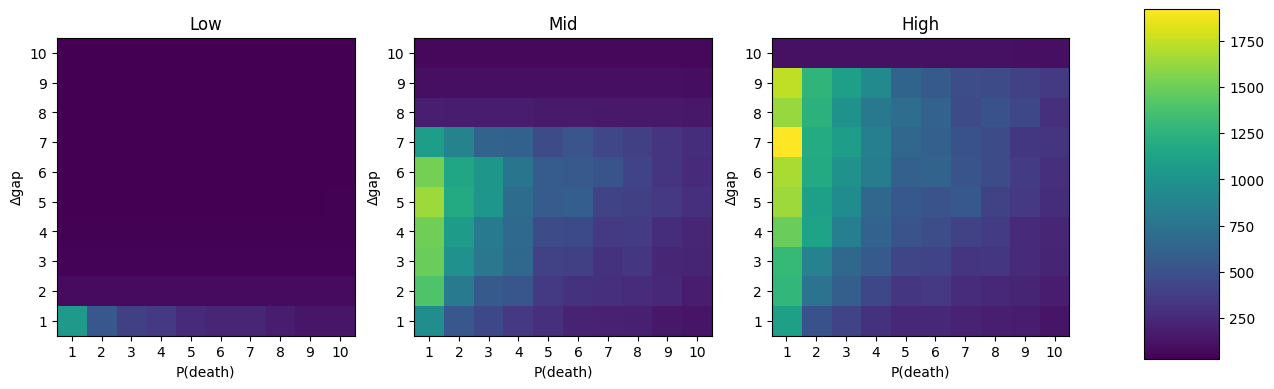

In [3]:
subplot_difficulty_matrix(players, share_cbar=True)

In [4]:
discrete = np.arange(1, 11)

def interpolate(data, res=100):
    smooth = np.linspace(1, 10, res)
    coords = np.array(np.meshgrid(smooth, smooth)).T.reshape(-1, 2)
    z = interpn((discrete, discrete), data, coords, "cubic").reshape(res, -1)
    return z

In [5]:
def subplot_interpolate(
        players, 
        titles=["Low", "Mid", "High"], 
        share_cbar=False):

    fig, axs = plt.subplots(1, len(players), figsize=(15, 5))
    extent = (1, 11, 1, 11)
    extent = [e - 0.5 for e in extent]
    
    values = np.array([interpolate(np.load(f"{p}_means.npy")) for p in players])
    vmin = np.array(values).min()
    vmax = np.array(values).max()

    for i, ax in enumerate(axs):
        data = np.flip(values[i], axis=0)
        if not share_cbar:
            im = ax.matshow(data, extent=extent)
            ax.figure.colorbar(ax.images[0], ax=ax, orientation='vertical')
        else:
            im = ax.matshow(data, extent=extent, vmin=vmin, vmax=vmax)
        ax.set_xlabel("P(death)")
        ax.set_ylabel("\u0394gap")
        ax.xaxis.set_ticks_position('bottom')
        # show all ticks
        ax.set_xticks(range(1, 11))
        ax.set_yticks(range(1, 11))
        ax.set_title(f"{titles[i]}")
    if share_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
    plt.show()


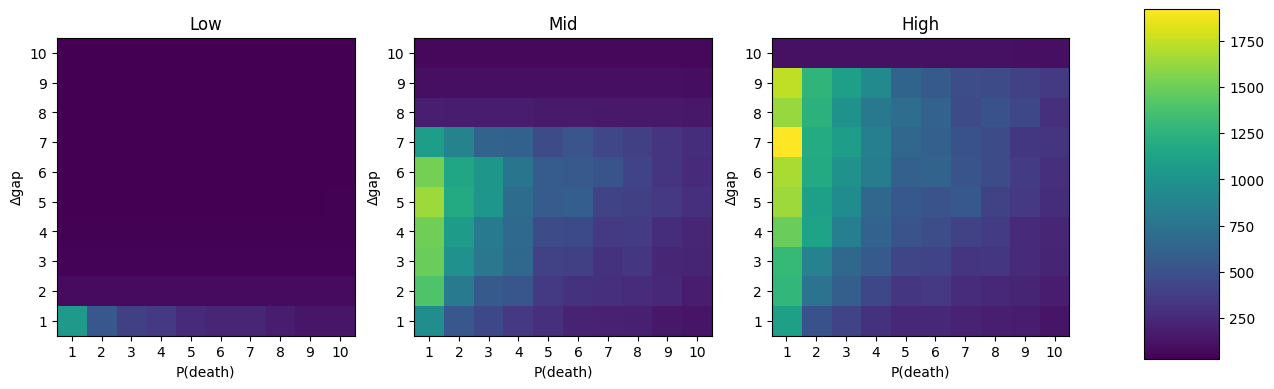

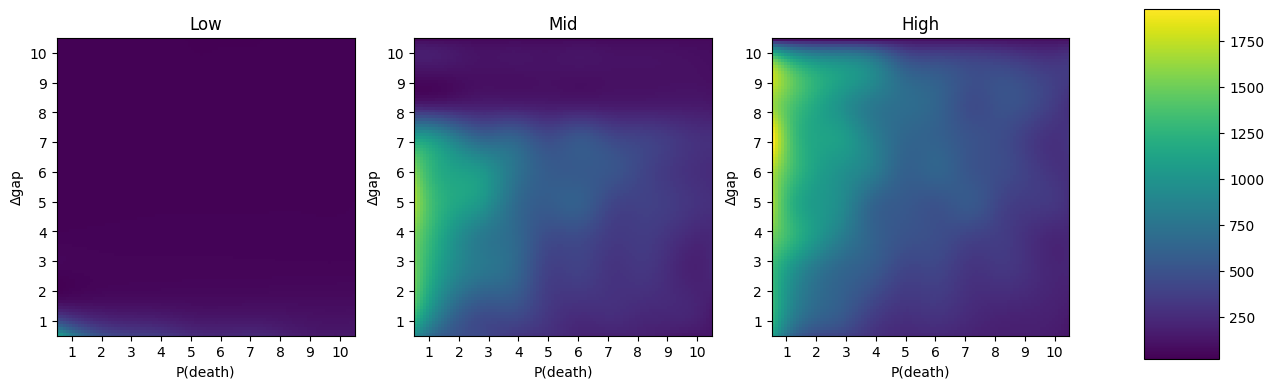

In [6]:
subplot_difficulty_matrix(players, share_cbar=True)
subplot_interpolate(players, share_cbar=True)

# Difficulty curves
$$
\lambda : \mathbb{R}^+ \mapsto \mathbb{R}^2 \\
d \in [1, 10] \mapsto \begin{bmatrix} P(death) \\ \Delta gap\end{bmatrix} \in [1, 10]^2
$$
We'll be playing with 
$$
\lambda_1(d) = \begin{bmatrix} d \\ 5 \end{bmatrix},\quad
\lambda_2(d) = \begin{bmatrix} 5 \\ d \end{bmatrix}
$$
Where the first travels along the x-axis and the second along the y-axis.

In [7]:
D = np.linspace(1, 10, 100)
X, Y = np.meshgrid(D, D)
data = np.load(f"{players[-1]}_means.npy")
Z = interpolate(data, res=100)

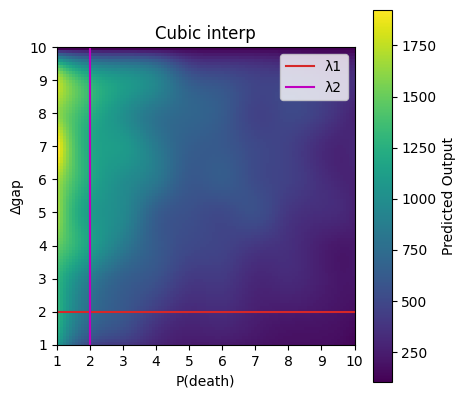

In [8]:
plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

constant = 2
c1, c2 = 'tab:red', 'm'
plt.axhline(constant, color=c1, label='\u03BB1')
plt.axvline(constant, color=c2, label='\u03BB2')

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.legend()
plt.title('Cubic interp')
plt.show()

In [9]:
# Have to flip x and why for some reason???
lambda_1 = lambda arr: np.column_stack((np.full_like(arr, constant), arr))
lambda_2 = lambda arr: np.column_stack((arr, np.full_like(arr, constant)))

line_1 = lambda_1(D)
line_2 = lambda_2(D)

y_pred_1 = interpn((discrete, discrete), data, line_1, "cubic")
y_pred_2 = interpn((discrete, discrete), data, line_2, "cubic")

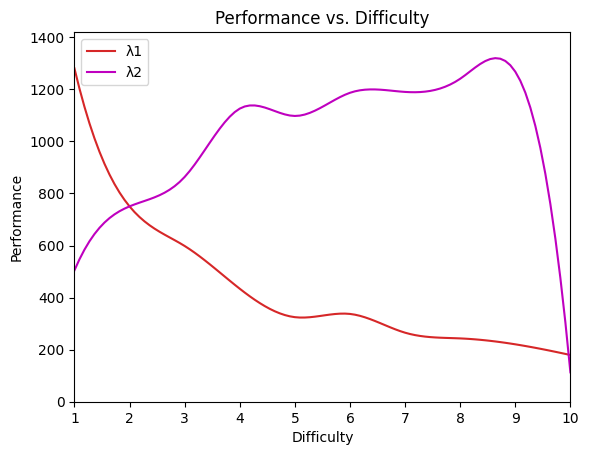

In [10]:
# Plot performance vs. d
plt.plot(D, y_pred_1, label='\u03BB1', color=c1)
plt.plot(D, y_pred_2, label='\u03BB2', color=c2)
plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.xlim(1, 10)
# set y-axsis from 0 to max of y_pred_1 and y_pred_2
plt.ylim(0, max(max(y_pred_1), max(y_pred_2)) + 100)
plt.legend()
plt.title('Performance vs. Difficulty')
plt.show()

# Do the same for given player but horizontal lines

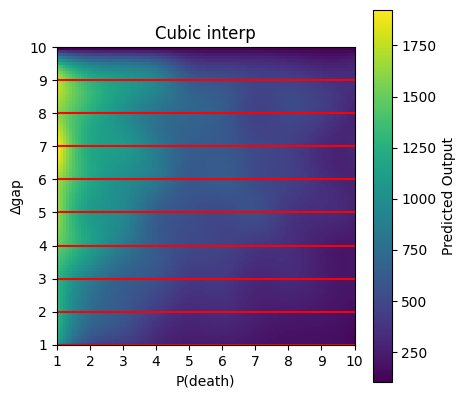

In [11]:
plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

constant = 0
[plt.axhline(c, color='r') for c in range(1, 11)]

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.title('Cubic interp')
plt.show()

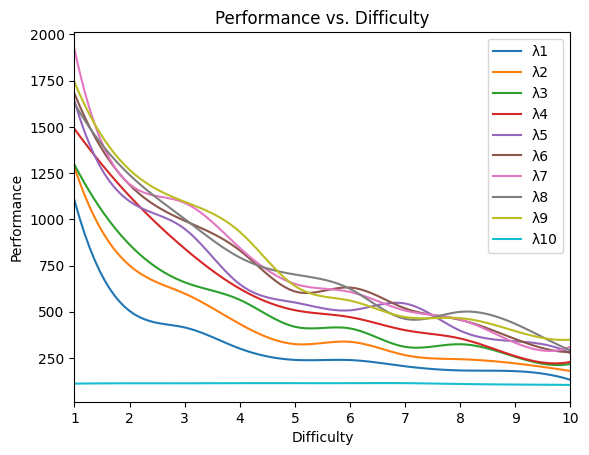

In [12]:
# Have to flip x and why for some reason???
for i in range(1, 11):
    line = np.column_stack((np.full_like(D, i), D))
    pred = interpn((discrete, discrete), data, line, "cubic")
    plt.plot(D, pred, label=f'\u03BB{i}')

plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.xlim(1, 10)
# set y-axsis from 0 to max of y_pred_1 and y_pred_2
plt.legend()
plt.title('Performance vs. Difficulty')
plt.show()

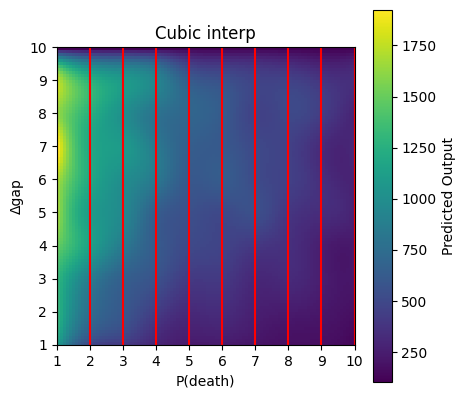

In [13]:
plt.matshow(Z, extent=(1, 10, 1, 10), origin='lower')
plt.colorbar(label='Predicted Output')

constant = 0
[plt.axvline(c, color='r') for c in range(1, 11)]

plt.gca().xaxis.set_ticks_position('bottom')
# set ticks
plt.xticks(range(1, 11))
plt.yticks(range(1, 11))
plt.xlabel("P(death)")
plt.ylabel("\u0394gap")
plt.title('Cubic interp')
plt.show()

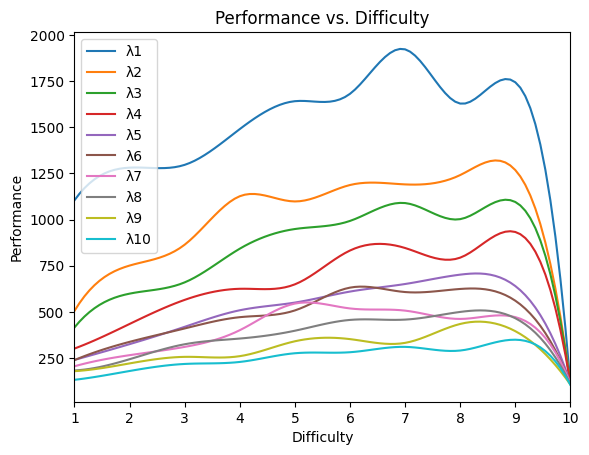

In [14]:
# Have to flip x and why for some reason???
for i in range(1, 11):
    line = np.column_stack((D, np.full_like(D, i)))
    pred = interpn((discrete, discrete), data, line, "cubic")
    plt.plot(D, pred, label=f'\u03BB{i}')

plt.xlabel('Difficulty')
plt.ylabel('Performance')
plt.xlim(1, 10)
# set y-axsis from 0 to max of y_pred_1 and y_pred_2
plt.legend()
plt.title('Performance vs. Difficulty')
plt.show()

# Trainning session

In [70]:
# data = np.load("models/04_18/PPO_00_05_train_session.npy")
data = np.load("models/05_08/PPO_16_31_train_session.npy")

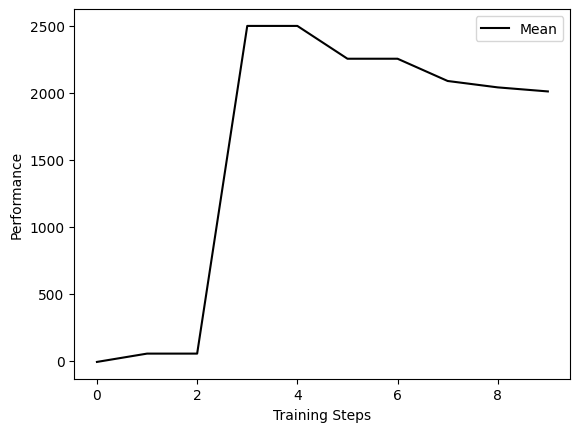

In [71]:
plt.plot(data.mean(axis=1), color="k", label='Mean')
plt.legend()
plt.xlabel('Training Steps')
plt.ylabel('Performance')
plt.show()

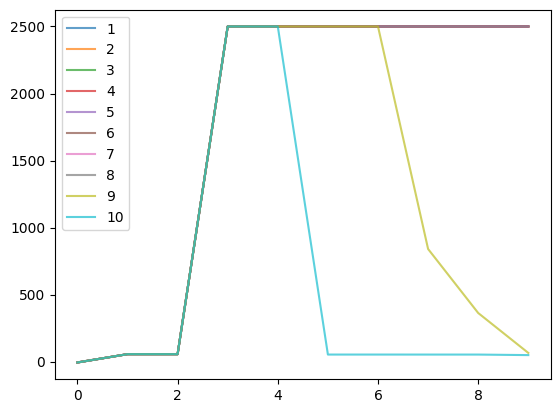

In [72]:
for d in range(10):
    plt.plot(data[:, d], label=f'{d+1}', alpha=0.7)
plt.legend()
# save y limits
ylim = plt.ylim()

(-97.28, 2623.68)

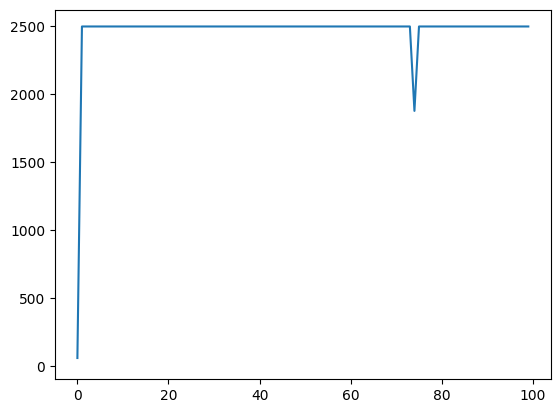

In [66]:
plt.plot(data[:, 0])
plt.ylim(ylim)